In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [3]:
df = pd.read_excel(r'data.xlsx')

df.head()

,Дата,Газпром,Лукойл,Роснефть,Сбербанк,Ростелеком
0,28.12.2012,144.31,2005.9,269.51,92.85,119.75
1,27.12.2012,145.00,2014.0,267.86,92.67,118.88
2,26.12.2012,144.90,2018.4,267.18,92.27,118.65
3,25.12.2012,144.54,2014.0,265.29,92.70,118.38
4,24.12.2012,145.24,2016.1,265.59,92.77,119.65


## Задание 1.
Используя имеющиеся данные , найти среднемесячные цены и на их основе оценить ожидаемую доходность от ивестиций сроком на 1 год и ковариационную матрицу. Исследовать будем данные Лукойла.

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'])
# df.set_index('Дата', inplace=True)

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_14984\1802953769.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Дата'] = pd.to_datetime(df['Дата'])


Рассчитаем среднемесячные цена.

In [5]:
def calculate_avg_monthly_prices(df):
    df['Год'] = df['Дата'].dt.year
    df['Месяц'] = df['Дата'].dt.month

    df.set_index('Дата', inplace=True)
    avg_prices = df.groupby(['Год', 'Месяц']).mean()

    return avg_prices

In [6]:
avg_monthly_prices = calculate_avg_monthly_prices(df)

avg_monthly_prices

Газпром       Лукойл    Роснефть    Сбербанк  Ростелеком
Год  Месяц                                                             
2008 1      326.684118  1848.640000  202.061176   97.318235  285.058824
     2      307.094500  1771.580500  188.973000   85.202000  277.684000
     3      299.436000  1801.030500  199.206000   75.551000  277.117500
     4      309.168182  2070.314545  225.344545   75.946818  282.605909
     5      349.415500  2469.745500  261.830500   83.994000  273.011000
     6      344.289500  2435.684000  276.170500   79.552000  274.411000
     7      301.526087  2139.203913  251.782609   73.109565  280.446087
     8      251.645238  1851.392381  210.688571   62.609048  279.529524
     9      210.716190  1635.366190  189.031905   48.308095  244.140476
     10     129.059524  1044.066667  110.409048   29.941905  189.387619
     11     115.323333   916.127222  103.535556   25.908333  193.250556
     12     110.642609   948.120000  108.795217   22.087391  241.766522
2009 1      109.914375  1063.086250  111.161250   18.720000  294.256875
     2      118.049474  1161.625263  117.292105   15.975789  304.747368
     3      124.683810  1279.632857  148.161905   19.744286  299.253333
     4      141.600000  1479.020909  171.994545   26.159545  318.445909
     5      170.357368  1558.094211  183.559474   35.207895  270.642632
     6      168.923333  1554.533810  189.220476   44.992857  192.926190
     7      152.018261  1437.131304  172.555652   38.645217  157.768261
     8      164.571905  1554.060476  195.670000   47.143810  162.640952
     9      173.074545  1621.228182  216.450909   57.475000  156.642273
     10     186.424091  1825.734091  239.062727   66.294545  166.564091
     11     177.825500  1722.073500  242.028000   69.039000  189.074500
     12     174.810870  1672.219565  249.057391   77.528261  159.875652
2010 1      186.701333  1701.209333  257.351333   87.984667  150.293333
     2      174.927368  1597.119474  229.184737   81.424737  149.078421
     3      169.819545  1639.765455  233.987727   86.274091  149.785455
     4      175.658182  1713.341364  243.464545   85.687727  138.093182
     5      158.307895  1471.863158  218.456316   73.418947  107.907895
     6      158.148095  1646.507143  211.899524   72.397143  108.149524
     7      156.588182  1638.497727  192.753636   80.192727  109.112273
     8      162.397727  1666.720455  201.348182   80.550909  110.834091
     9      161.891818  1714.257273  202.530000   82.985909  132.420909
     10     164.372381  1752.527143  212.709524   94.868095  136.722381
     11     171.670952  1739.085714  215.422381  100.247143  139.562381
     12     193.245000  1769.443182  219.104091  105.619545  145.262273
2011 1      196.258667  1882.801333  241.576000  106.641333  170.400667
     2      205.693684  1940.932105  258.545789  101.133158  161.209474
     3      218.812727  2012.550000  262.140000  101.310455  163.025455
     4      234.064286  1979.819048  254.465714  104.653333  169.031905
     5      204.188000  1766.690000  232.092000   96.494500  164.665000
     6      202.176190  1763.328571  239.395714   96.707143  177.550476
     7      202.169524  1830.257143  236.660000  103.262857  202.075238
     8      175.753478  1686.139130  211.327826   87.026087  165.802174
     9      164.233182  1695.472727  211.005909   78.798636  165.660909
     10     138.299048  1440.514286  169.024762   64.956190  125.235714
     11     177.611429  1721.071429  215.932857   79.686667  155.470000
     12     172.267727  1654.818182  212.587273   82.849091  149.577273
2012 1      180.686667  1770.528571  226.197143   85.566667  151.564762
     2      190.077000  1835.395000  221.650000   95.964000  150.572500
     3      190.546667  1862.476190  217.052857   99.013333  147.093333
     4      174.057619  1788.361905  210.300952   94.512381  139.181905
     5      152.381739  1683.486957  199.827826   85.870435  121.971739
     6      152.874000  1732.010000  201.285500   82.83

Ожидаемую доходность инвестиций найдем по формуле:
$$E(R_i)=\frac{1}{n}\sum_{j=1}^n R_{j},$$
где
+ $E(R_i) - $ожидаемая доходность для акции $i$;
+ $R_{j} - $доходность компании в период $j$;
+ $n - $количество периодов(например, месяцев).

$$R_j=\frac{P_{новая} - P_{старая}+D}{P_{старая}}\cdot 100\%$$
Рассчитаем $R_j$ для каждого года.

In [7]:
early_returns = ((avg_monthly_prices.groupby('Год').last() - avg_monthly_prices.groupby('Год').first()) / avg_monthly_prices.groupby('Год').first())

early_returns

,Газпром,Лукойл,Роснефть,Сбербанк,Ростелеком
Год,,,,,
2008,-0.661316,-0.487126,-0.461573,-0.773040,-0.151871
2009,0.590428,0.572986,1.240505,3.141467,-0.456680
2010,0.035049,0.040109,-0.148619,0.200431,-0.033475
2011,-0.122241,-0.121087,-0.119998,-0.223105,-0.122203
2012,-0.216625,0.128372,0.134002,0.090214,-0.232998


In [8]:
expected_returns = pd.DataFrame({'Компания': early_returns.mean().keys(),
                                 'Ожидаемая доходность': early_returns.mean().values})

expected_returns

,Компания,Ожидаемая доходность
0,Газпром,-0.074941
1,Лукойл,0.026651
2,Роснефть,0.128863
3,Сбербанк,0.487194
4,Ростелеком,-0.199445


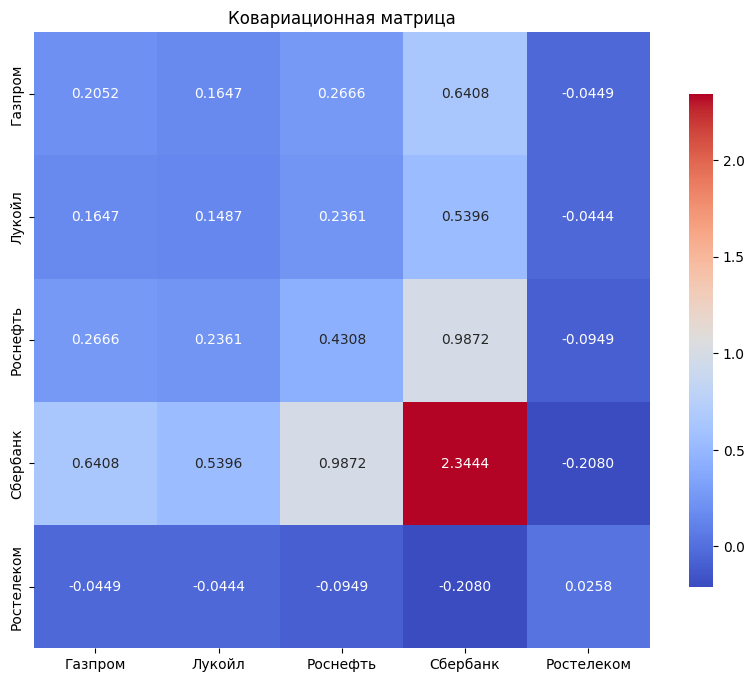

In [9]:
cov_matrix = early_returns.cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt='.4f', cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, xticklabels=cov_matrix.columns, yticklabels=cov_matrix.columns)
plt.title('Ковариационная матрица')
plt.show()

## Задача 2. 
Построить кривую эффективных  портфелей в  координатах $(\mu_X, \sigma_X)$ и $(\mu_X, \sigma^2_X)$

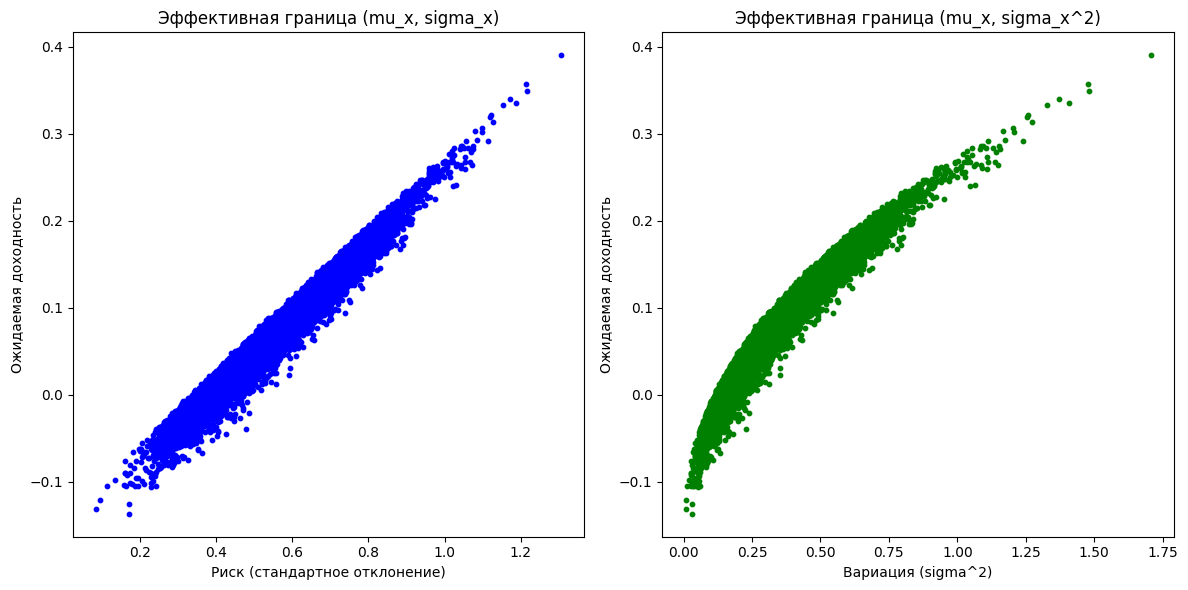

In [10]:
def portfolio_performance(weights, expected_returns, cov_matrix):
    ret = np.dot(weights, expected_returns)
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return ret, risk

def efficient_frontier(expected_returns, cov_matrix, num_portfolios=10**4):
    results = np.zeros((2, num_portfolios))
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(len(expected_returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        ret, risk = portfolio_performance(weights, expected_returns, cov_matrix)
        results[0, i] = risk
        results[1, i] = ret

    weights_array = np.array(weights_record)
    return results, weights_array

results, weights_array = efficient_frontier(expected_returns['Ожидаемая доходность'], cov_matrix)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(results[0, :], results[1, :], c='blue', marker='o', s=10)
plt.title('Эффективная граница (mu_x, sigma_x)')
plt.xlabel('Риск (стандартное отклонение)')
plt.ylabel('Ожидаемая доходность')

plt.subplot(1, 2, 2)
plt.scatter(results[0, :]**2, results[1, :], c='green', marker='o', s=10)
plt.title('Эффективная граница (mu_x, sigma_x^2)')
plt.xlabel('Вариация (sigma^2)')
plt.ylabel('Ожидаемая доходность')

plt.tight_layout()
plt.show()